In [ ]:


from keras.layers import Input, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
!unzip /content/drive/MyDrive/chest_xray.zip -d /content/drive/MyDrive/chest_xray/

Archive:  /content/drive/MyDrive/chest_xray.zip
replace /content/drive/MyDrive/chest_xray/chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/chest_xray/chest_xray/__MACOSX/chest_xray/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/chest_xray/chest_xray/__MACOSX/chest_xray/._test? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/chest_xray/chest_xray/__MACOSX/chest_xray/._train? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/chest_xray/chest_xray/__MACOSX/chest_xray/test/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/chest_xray/chest_xray/__MACOSX/chest_xray/test/._NORMAL? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/chest_xray/chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/chest_xray/chest_xray/__MACOSX/chest_xray/test

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/chest_xray/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/chest_xray/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/chest_xray/chest_xray/chest_xray/train/*')

In [ ]:
x = Flatten()(vgg.output)


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)


model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/chest_xray/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/chest_xray/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 624 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/chest_xray/chest_xray/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 16 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)  
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
163/163 [==============================] - 1136s 7s/step - loss: 0.1903 - accuracy: 0.9271 - val_loss: 0.2538 - val_accuracy: 0.9167
Epoch 2/5
163/163 [==============================] - 152s 932ms/step - loss: 0.1210 - accuracy: 0.9548 - val_loss: 0.2886 - val_accuracy: 0.9087
Epoch 3/5
163/163 [==============================] - 151s 925ms/step - loss: 0.1044 - accuracy: 0.9613 - val_loss: 0.2299 - val_accuracy: 0.9231
Epoch 4/5
163/163 [==============================] - 150s 921ms/step - loss: 0.0801 - accuracy: 0.9712 - val_loss: 0.5524 - val_accuracy: 0.8606
Epoch 5/5
163/163 [==============================] - 151s 926ms/step - loss: 0.0731 - accuracy: 0.9709 - val_loss: 0.3304 - val_accuracy: 0.9006


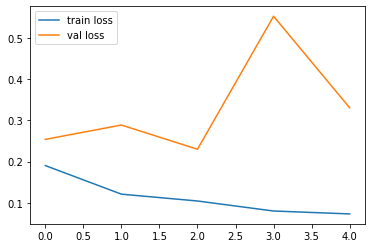

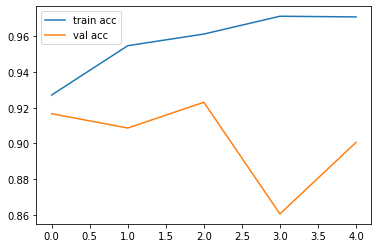

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('model_vgg16.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing import image


In [ ]:
model = load_model('model_vgg16.h5')

In [ ]:
# predict with val dataset
img = image.load_img('/content/drive/MyDrive/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg',target_size=(224,224,3))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(x)

In [ ]:
classes

array([[1., 0.]], dtype=float32)